<p>Suppose you are given two datasets as shown below:</p>
<ul>
<li><a href="https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/gini_index.csv">Data</a> on the Gini coefficient (proxy for income inequality).
  <ul><li>This is a number between 0 and 1, where 0 corresponds with perfect equality (e.g. everyone has the same income) and 1 corresponds with perfect inequality (where one person has all the income—and everyone else has no income). You can read more about the Gini coefficient on Wikipedia <a href="https://en.wikipedia.org/wiki/List_of_countries_by_income_equality">here</a></li>
  </ul>
</li>
<li><a href="https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/happiness_index.csv">Data</a> containing a Happiness Score from the World Happiness Report.
  <ul><li>The score represents a weighted average across a number of variables and ranges from 1-10, where 10 is perfectly happy. You can read more about the World Happiness Report Wikipedia <a href="https://en.wikipedia.org/wiki/World_Happiness_Report">here</a></li>
  </ul>
</li>
</ul>
<p>Given this data, determine if there is a correlation between income equality (field: 'current' in Gini index dataset) and happiness (field: 'overall_score' in Happiness dataset). You'll only want to keep records that exist in both datasets (there are many countries/regions in the World Happiness Report that do not have a measured Gini index).</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
gini = pd.read_csv('https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/gini_index.csv')
gini.head(5)

country  mid_90s   2000  mid_2000s  current
0  Australia    0.309  0.317      0.315    0.336
1    Austria    0.238  0.252      0.265    0.261
2    Belgium    0.287  0.289      0.271    0.259
3     Canada    0.289  0.318      0.317    0.324
4      Chile    0.427    NaN      0.403    0.394

In [3]:
pp.ProfileReport(gini)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
happiness = pd.read_csv('https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/happiness_index.csv')
happiness.head(5)

country_or_region  overall_score  gdp_per_capita  social_support  \
0           Finland          7.769           1.340           1.587   
1           Denmark          7.600           1.383           1.573   
2            Norway          7.554           1.488           1.582   
3           Iceland          7.494           1.380           1.624   
4       Netherlands          7.488           1.396           1.522   

   healthy_life_expecations  freedom_to_make_life_choices  generosity  \
0                     0.986                         0.596       0.153   
1                     0.996                         0.592       0.252   
2                     1.028                         0.603       0.271   
3                     1.026                         0.591       0.354   
4                     0.999                         0.557       0.322   

   perceptions_of_corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [5]:
pp.ProfileReport(happiness)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#create new dataframe of just country and current score
gini_new=gini[['country','current']]
#rename columns
gini_new.rename(columns={"current": "gini_coefficient"} , inplace=True)
gini_new.head(5)

country  gini_coefficient
0  Australia             0.336
1    Austria             0.261
2    Belgium             0.259
3     Canada             0.324
4      Chile             0.394

In [7]:
#create new dataframe of just country and score
happiness_new=happiness[['country_or_region', 'overall_score']]
#rename columns
happiness_new.rename(columns={"country_or_region": "country", "overall_score": "happiness_score"} , inplace=True)
happiness_new.head(5)

country  happiness_score
0      Finland            7.769
1      Denmark            7.600
2       Norway            7.554
3      Iceland            7.494
4  Netherlands            7.488

In [8]:
#merge the datasets
merged = gini_new.merge(happiness_new, how='left', on="country")
merged.head(5)

country  gini_coefficient  happiness_score
0  Australia             0.336            7.228
1    Austria             0.261            7.246
2    Belgium             0.259            6.923
3     Canada             0.324            7.278
4      Chile             0.394            6.444

In [9]:
#examine correlations
merged['gini_coefficient'].corr(merged['happiness_score'])

-0.31253857727240064

There is a moderate negative correlation.  As income inequality increases (Gini), happiness decreases

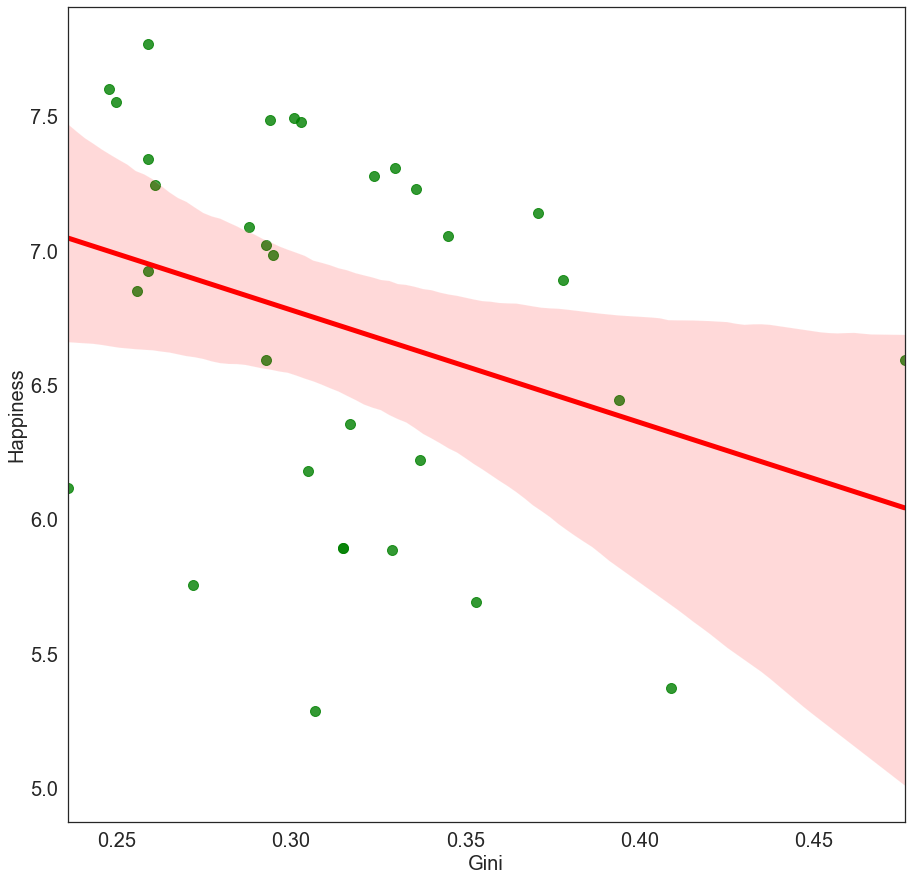

In [10]:
plt.figure(figsize=(15,15))
sns.set(style="white")
sns.regplot(x="gini_coefficient", y="happiness_score", data=merged, scatter_kws={"color": "green",'s':100}, line_kws={"color": "red",'linewidth':5})
plt.xlabel("Gini", size=20)
plt.xticks(size=20)
plt.ylabel("Happiness", size=20)
plt.yticks(size=20)
plt.show()